In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only directory
import os
for dirname, _, filenames in os.walk('/CropDisease'):
    for filename in filenames:
        pass


In [23]:
directory = 'CropDisease'

In [24]:
import os
print(os.listdir(directory))
#list of files and directories 

['Bhutta_Healthy', 'Dhaan_Brown_Spot', 'Dhaan_Healthy', 'Dhaan_Leaf_Blast', 'Dhaan_Neck_Blast', 'Invalid']


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
#subdirectories of a main directory, with one subdirectory per class

In [26]:
#Total class label in dataset
print("Total number of class labels :")
len(os.listdir('CropDisease'))

Total number of class labels :


6

In [27]:
BATCH_SIZE = 32
IMG_SIZE = (256, 256)

In [28]:
dataset = image_dataset_from_directory(directory,
                                       shuffle=True,
                                       label_mode = 'categorical',
                                       batch_size=BATCH_SIZE,
                                       seed = 42,
                                       image_size=IMG_SIZE)

Found 556 files belonging to 6 classes.


In [29]:
# Printing class labels
class_names = dataset.class_names
num_classes = len(class_names)
print("The list of all class label names:")

for i in range(1, num_classes + 1):
    print(str(i) + ". ", class_names[i - 1])

The list of all class label names:
1.  Bhutta_Healthy
2.  Dhaan_Brown_Spot
3.  Dhaan_Healthy
4.  Dhaan_Leaf_Blast
5.  Dhaan_Neck_Blast
6.  Invalid


In [30]:
category_count = []

for root, dirs, files in os.walk(directory):
    for dir_path in dirs:
        category_count.append((dir_path, len(os.listdir(root+os.sep+dir_path))))

In [31]:
count_df = pd.DataFrame(category_count, columns=['Category', 'Count'])
count_df

,Category,Count
0,Bhutta_Healthy,0
1,Dhaan_Brown_Spot,158
2,Dhaan_Healthy,91
3,Dhaan_Leaf_Blast,163
4,Dhaan_Neck_Blast,144
5,Invalid,0


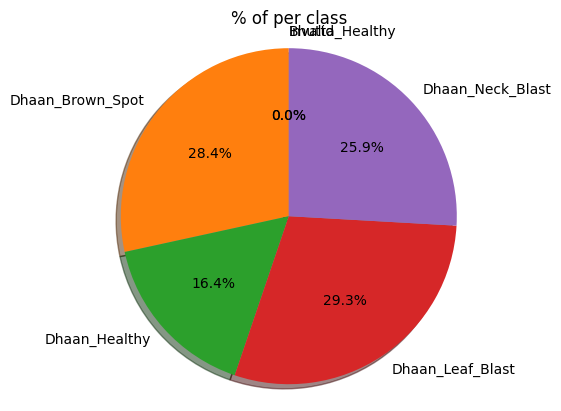

In [32]:
fig1, ax1 = plt.subplots()
ax1.pie(count_df.Count, labels=count_df.Category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of per class')
plt.show()

In [33]:
plant_df = pd.DataFrame({'Plants': ['Corn','Rice','Potato', 'Wheat', 'Invalid'],
                   'total_image': [14632, 2791, 8286, 3781, 1563]})
plant_df.set_index('Plants', inplace=True)
plant_df

,total_image
Plants,
Corn,14632
Rice,2791
Potato,8286
Wheat,3781
Invalid,1563


<Axes: title={'center': '% per plants'}, ylabel='total_image'>

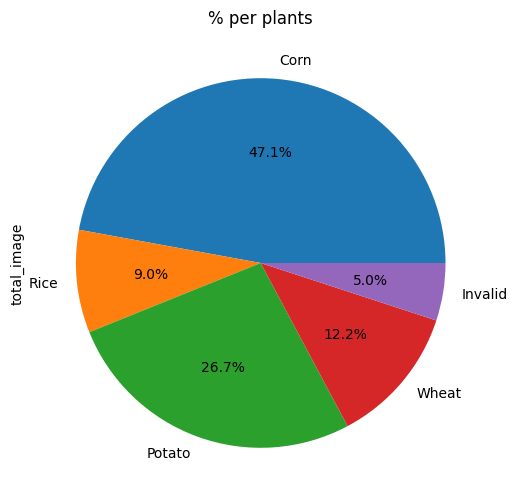

In [34]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
plant_df.total_image.plot(kind='pie', ax=ax, startangle=0, fontsize=10, autopct='%1.1f%%', title='% per plants')

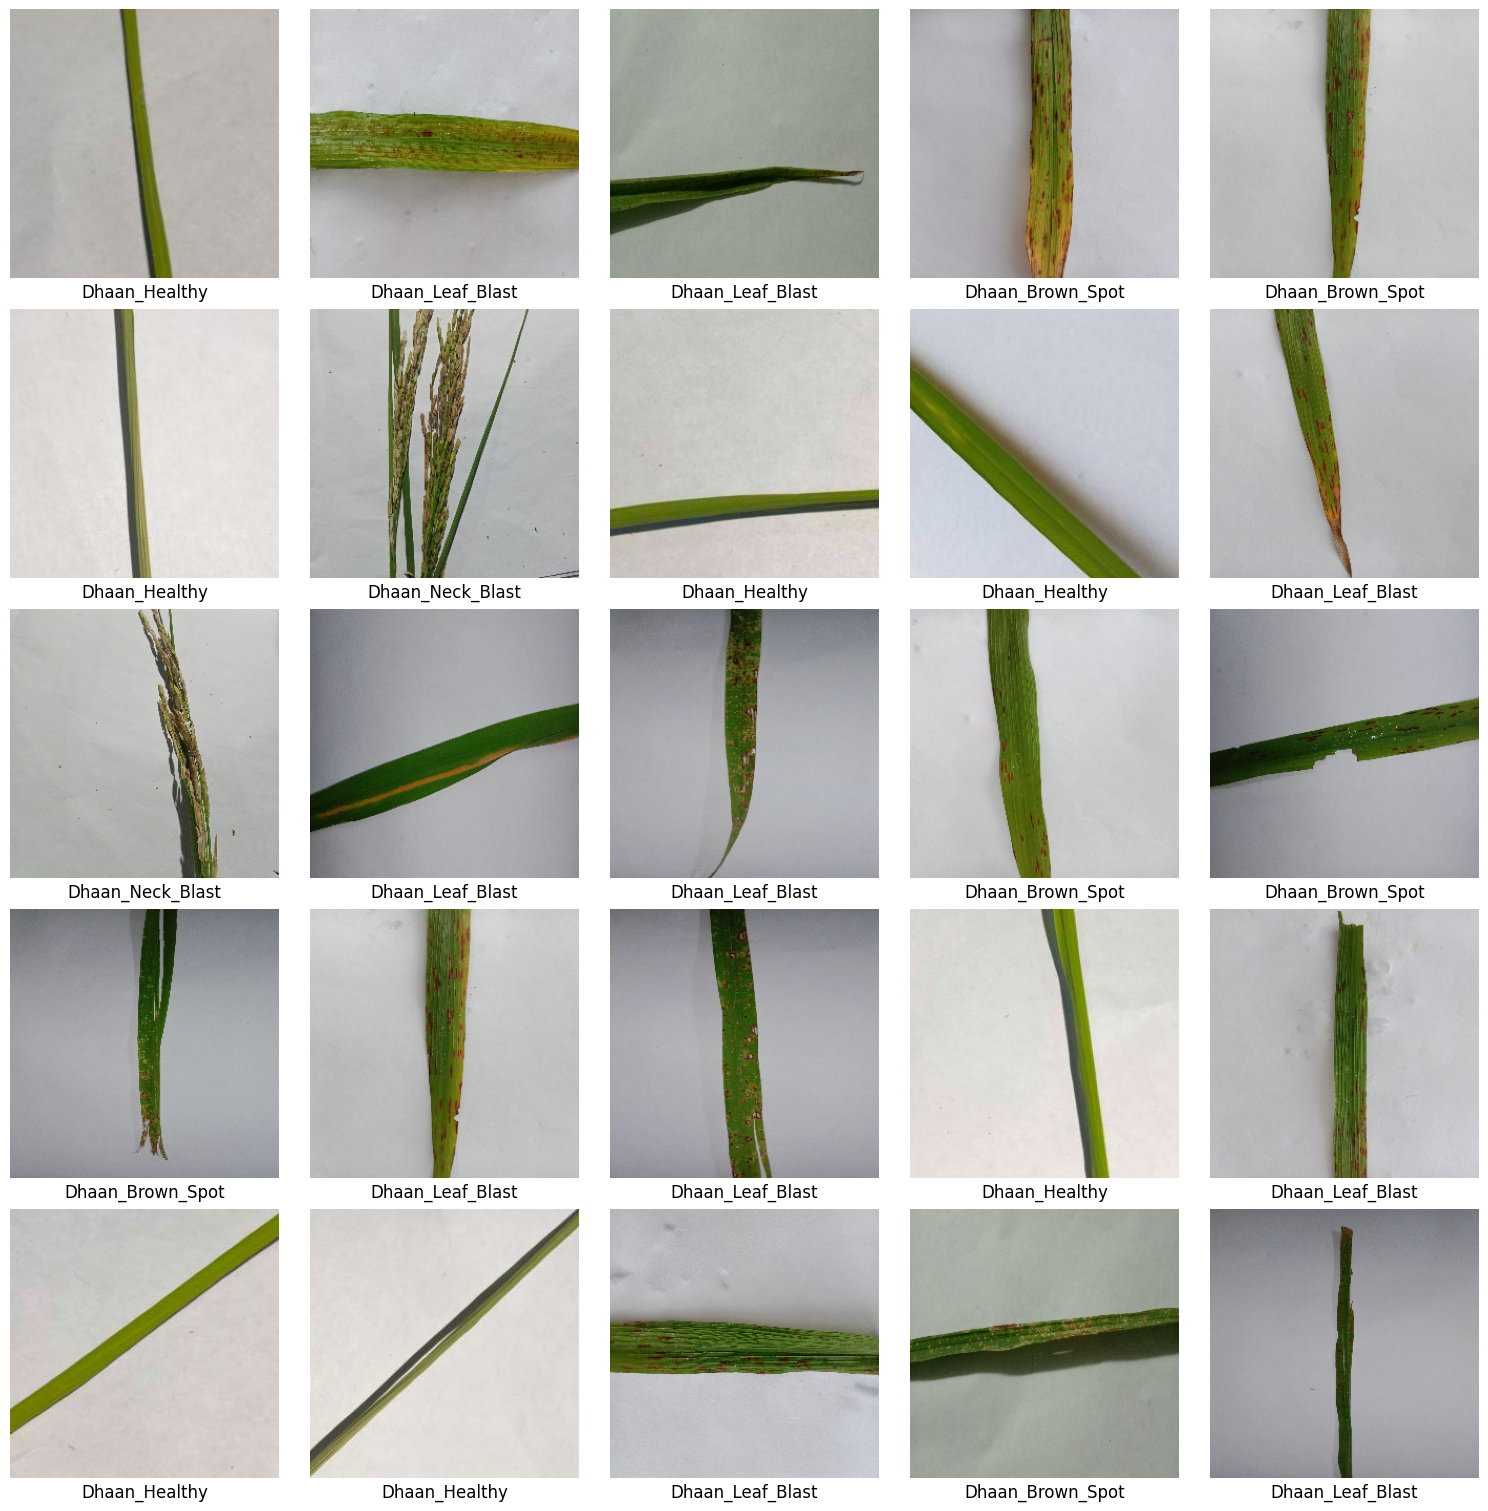

In [35]:
from re import sub

fig = plt.figure(figsize=(15, 15), constrained_layout=True)

for images, labels in dataset.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = sub(r"[_]+","_",class_names[np.argmax(labels[i])])
        plt.title(title, y=-0.1)
        plt.axis("off")


In [36]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
# Define data paths
train_path = "CropDisease/train/"
valid_path = "CropDisease/validation/"

In [38]:
# Define data augmentation parameters for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

In [39]:
# Define data augmentation parameters for the validation dataset
valid_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
# Create training and validation data generators
train_generator = train_datagen.flow_from_directory(
    train_path = '\c:\Users\jaoha\OneDrive\Documents\GitHub\mlproject\Crop-Disease-ML\CropDisease\train\'

    target_size = r'(224, 224)'

    batch_size=32,
    class_mode='categorical'
)


SyntaxError: unterminated string literal (detected at line 3) (4285750584.py, line 3)